<a href="https://colab.research.google.com/github/BahodirML/Coding_Practices/blob/main/Untitled200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

#creating model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

#evaluation
from sklearn.metrics import confusion_matrix

#saving model
import os

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

[4]


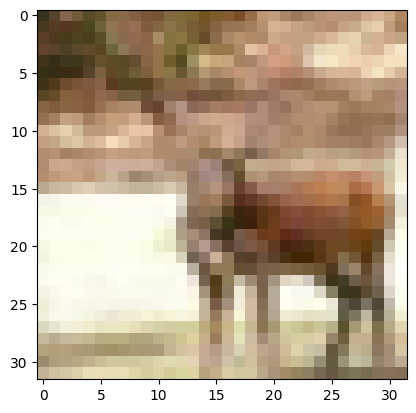

In [7]:
i = 1001
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


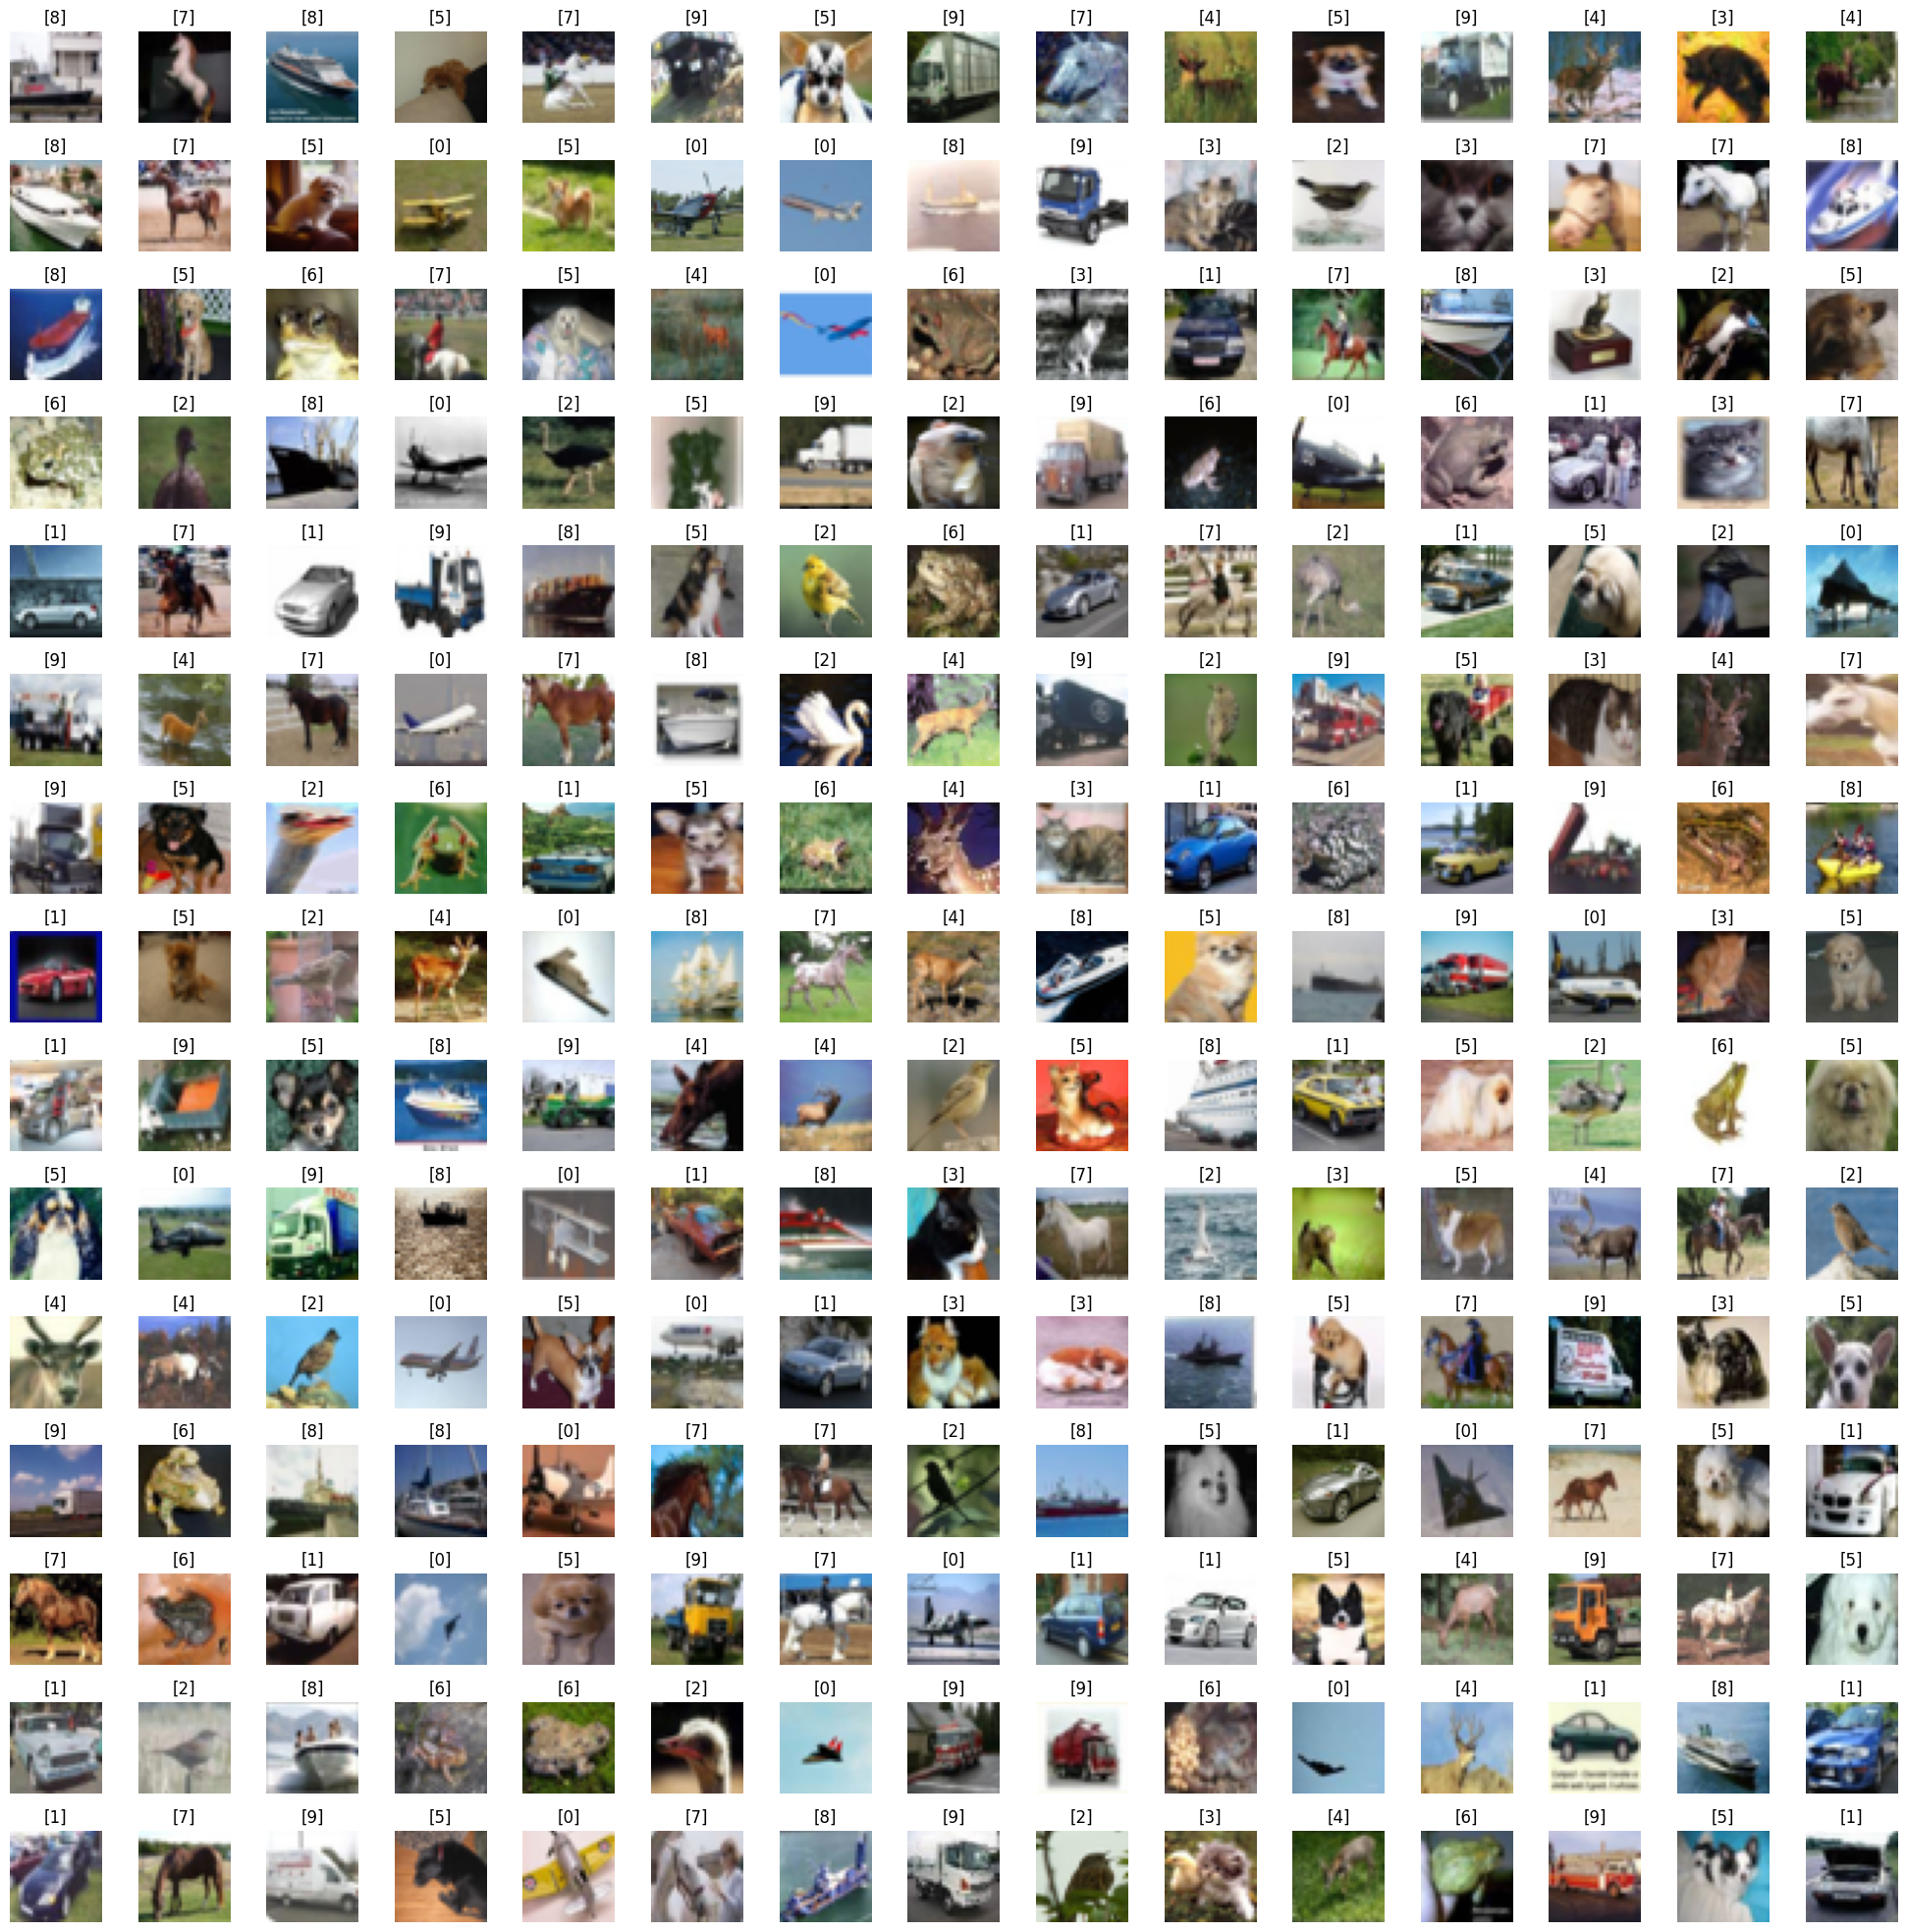

In [8]:
w_grid = 15
l_grid = 15
fig, axes = plt.subplots(l_grid, w_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, l_grid*w_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [9]:
n_training

50000

##Data preparation

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
 num_cat = 10

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
#changing y_train into binaries
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [14]:
 y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
 X_train.shape

(50000, 32, 32, 3)

In [18]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

##Creating a model

In [19]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters =32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters =32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))


cnn_model.add(Conv2D(filters =64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters =64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=512, activation = 'relu'))

cnn_model.add(Dense(units=512, activation = 'relu'))

cnn_model.add(Dense(units =10, activation = 'softmax'))

In [20]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'] )

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [24]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True)


Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9707 - accuracy: 0.6644
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8861 - accuracy: 0.6988
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8326 - accuracy: 0.7164
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8037 - accuracy: 0.7287
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7716 - accuracy: 0.7418
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7599 - accuracy: 0.7480
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7401 - accuracy: 0.7549
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7326 - accuracy: 0.7588
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7074 - accuracy: 0.7687
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 

#Evaluating the model

In [25]:
evaluation = cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9145 - accuracy: 0.7229


In [40]:
predicted_probabilities = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=-1)

313/313 [==============================] - 1s 4ms/step


In [41]:
y_test = y_test.argmax(1)
y_test

AxisError: ignored

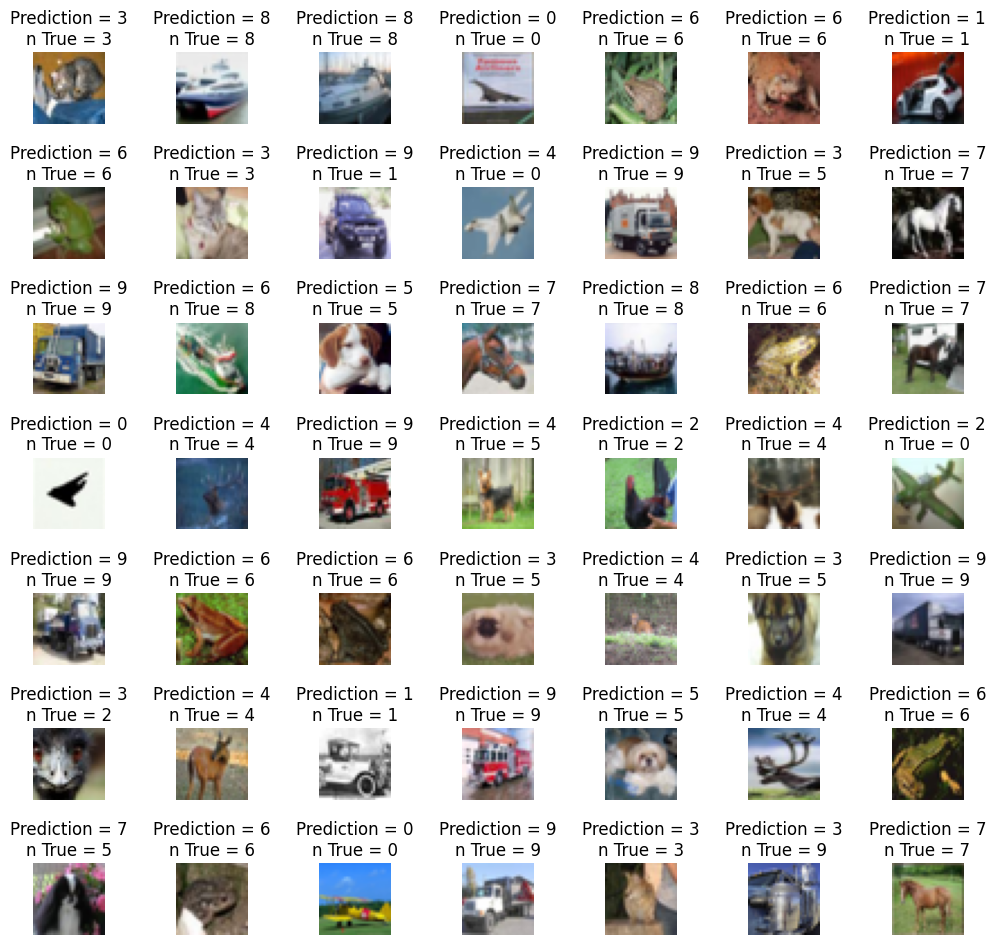

In [45]:
L=7
W = 7
fig, axes = plt.subplots(L,W, figsize = (12,12))
axes= axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\nn True = {}'.format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

<Axes: >

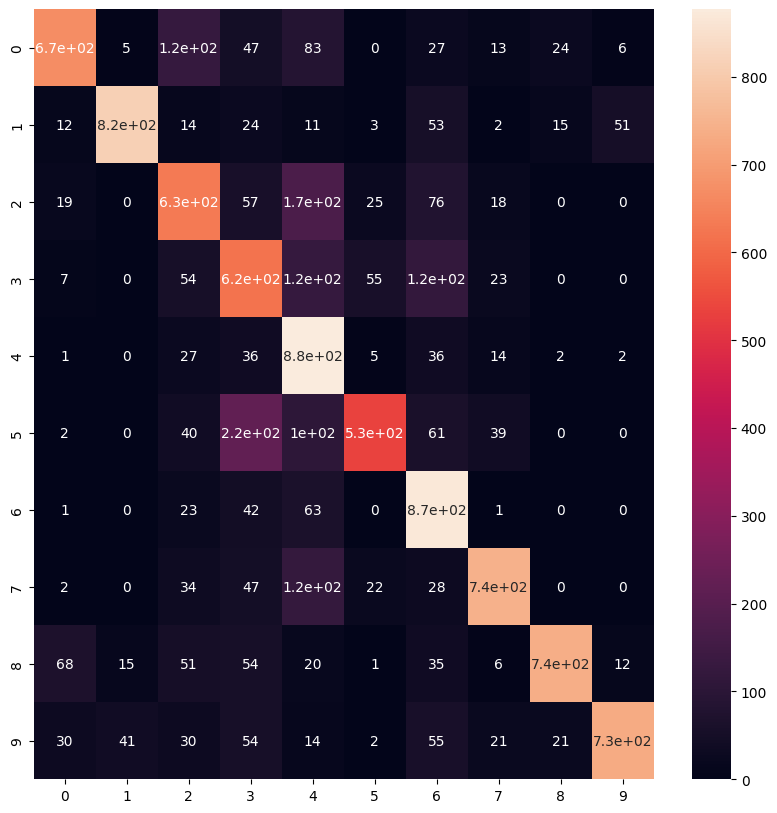

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

#Saving model


In [52]:
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
  os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
